**Datetime index**

In [1]:
from datetime import datetime

In [2]:
my_year = 2021
my_month = 1
my_day = 27
my_hour = 17
my_min = 13
my_sec = 54

In [3]:
my_date = datetime(my_year, my_month, my_day)
my_date

datetime.datetime(2021, 1, 27, 0, 0)

In [4]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)
my_date_time

datetime.datetime(2021, 1, 27, 17, 13, 54)

In [5]:
my_date_time.hour

17

In [6]:
type(my_date_time)

datetime.datetime

In [7]:
import numpy as np

In [8]:
np.array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [11]:
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [15]:
np.arange('1968', '1973', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972'], dtype='datetime64[Y]')

In [16]:
import pandas as pd

In [17]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('2020-01-01', periods=7, freq='Y')

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [19]:
pd.date_range('Jan 01, 2018', periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.to_datetime(['1/2/2018', 'Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [24]:
pd.to_datetime(['2/1/2018', '3/1/2018'], format='%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [25]:
data = np.random.randn(3, 2)
cols = ['A', 'B']
data

array([[-1.74463801, -0.44282521],
       [ 0.48368227,  0.68707787],
       [ 0.41905033, -0.19189727]])

In [26]:
idx = pd.date_range('2020-01-01', periods=3, freq='D')

df = pd.DataFrame(data, index=idx, columns=cols)
df

,A,B
2020-01-01,-1.744638,-0.442825
2020-01-02,0.483682,0.687078
2020-01-03,0.419050,-0.191897


In [27]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [28]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [29]:
df.index.argmax()

2

**Time resampling**

In [30]:
import pandas as pd

In [33]:
df = pd.read_csv('./datasets/starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [34]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [36]:
# daily --> yearly
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [39]:
def first_day(entry):
    # Is there an entry?
    if len(entry):
        # If so, return first entry
        return entry[0]

In [40]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


<AxesSubplot:xlabel='Date'>

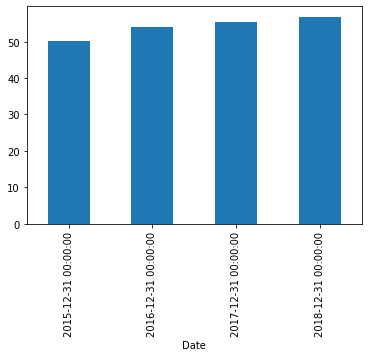

In [42]:
df['Close'].resample('A').mean().plot.bar()

**Time shifting**

In [45]:
import pandas as pd

df = pd.read_csv('./datasets/starbucks.csv', index_col='Date', parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [46]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [49]:
df.shift(3)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,38.0061,6906098.0
2015-01-08,37.2781,11623796.0
...,...,...
2018-12-24,64.0600,14390146.0
2018-12-26,62.1500,20264918.0
2018-12-27,61.3900,23524888.0


In [50]:
df.shift(-3)

,Close,Volume
Date,,
2015-01-02,37.8848,9732554.0
2015-01-05,38.4961,13170548.0
2015-01-06,37.2361,27556706.0
2015-01-07,37.4415,10021486.0
2015-01-08,37.7401,11040702.0
...,...,...
2018-12-24,63.3900,7712127.0
2018-12-26,64.4000,7690183.0
2018-12-27,NaN,NaN


In [51]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [52]:
df.shift(periods=1, freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


**Rolling and expanding**

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('./datasets/starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

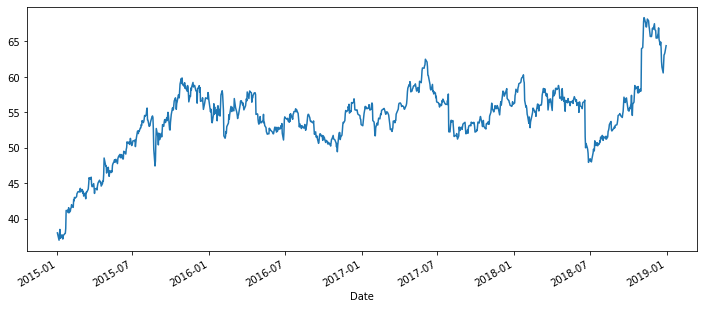

In [5]:
df['Close'].plot(figsize=(12, 5))

In [8]:
df.rolling(window=7).mean().head(20)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


<AxesSubplot:xlabel='Date'>

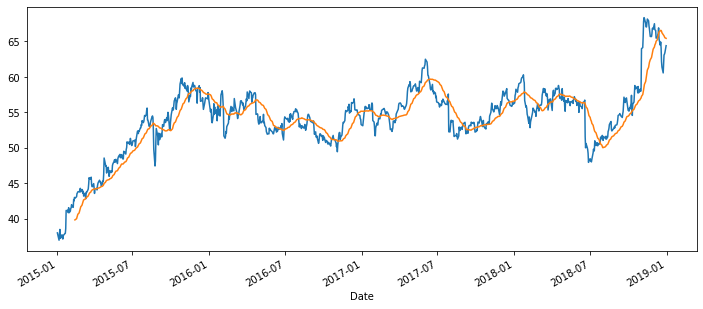

In [10]:
df['Close'].plot(figsize=(12, 5))
df.rolling(window=30).mean()['Close'].plot()

In [11]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [12]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


<AxesSubplot:xlabel='Date'>

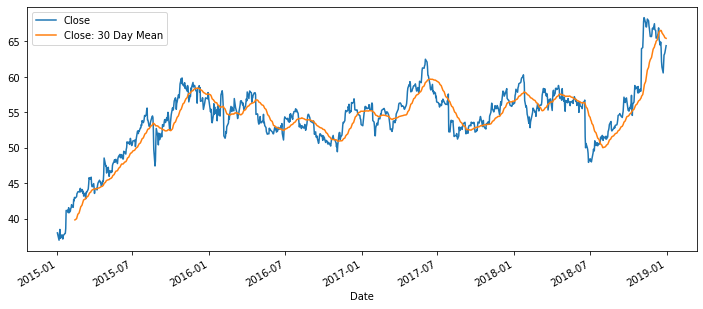

In [13]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

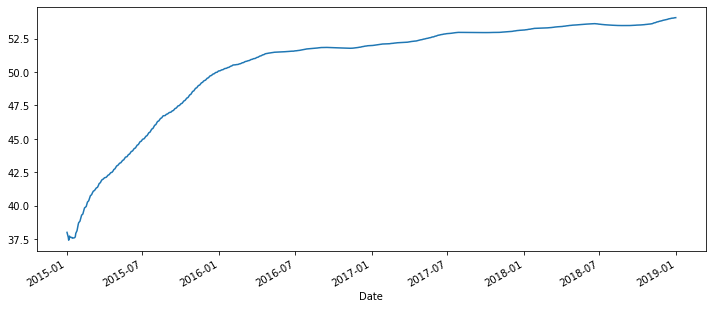

In [14]:
df['Close'].expanding().mean().plot(figsize=(12, 5))

**Visualizing**

In [15]:
df = pd.read_csv('./datasets/starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [16]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [17]:
# df.index = pd.to_datetime(df.index)

<AxesSubplot:xlabel='Date'>

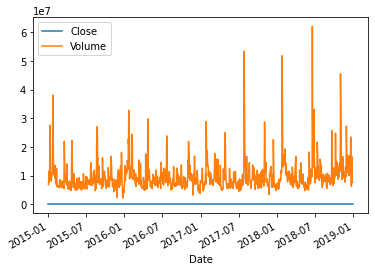

In [18]:
df.plot()

<AxesSubplot:xlabel='Date'>

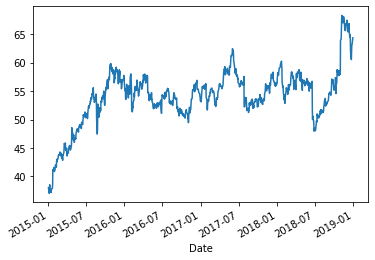

In [19]:
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

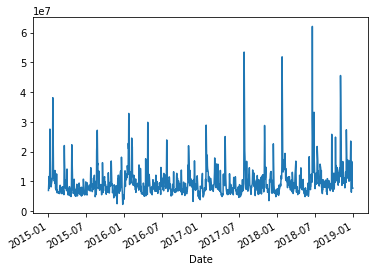

In [20]:
df['Volume'].plot()

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Count')]

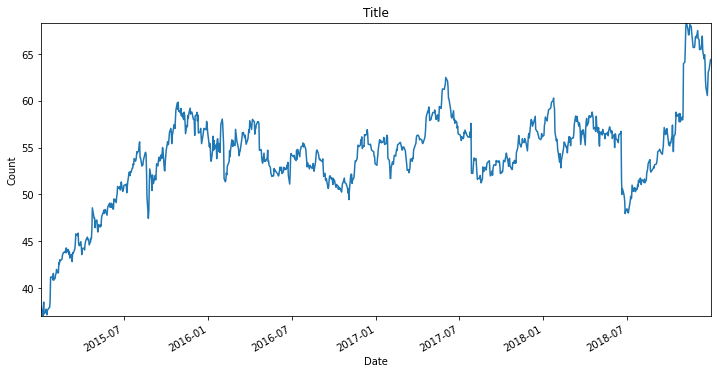

In [24]:
ax = df['Close'].plot(figsize=(12 ,6), title='Title')
ax.autoscale(axis='both', tight=True)
ax.set(xlabel='Date', ylabel='Count')

<AxesSubplot:xlabel='Date'>

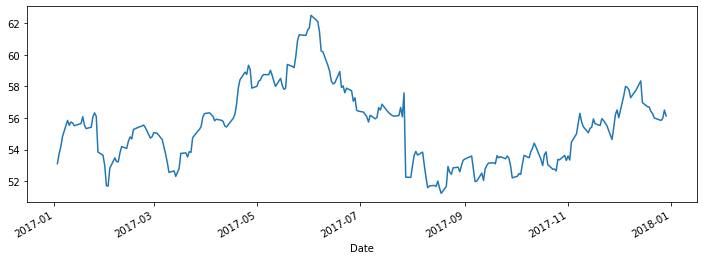

In [26]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12, 4))

<AxesSubplot:xlabel='Date'>

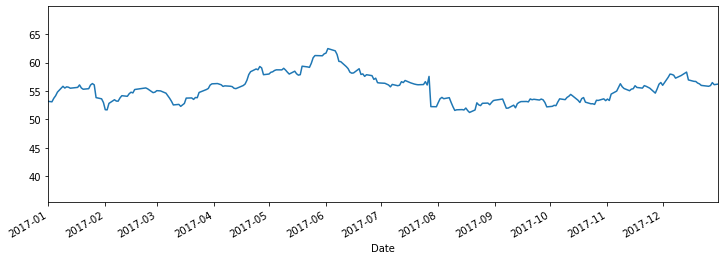

In [31]:
df['Close'].plot(figsize=(12, 4), xlim=['2017-01-01', '2017-12-31'])

<AxesSubplot:xlabel='Date'>

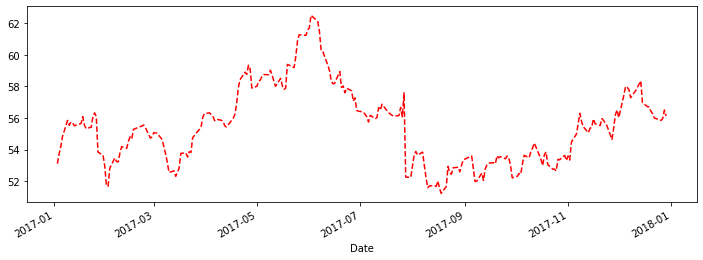

In [33]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12, 4), ls='--', c='red')

In [34]:
from matplotlib import dates

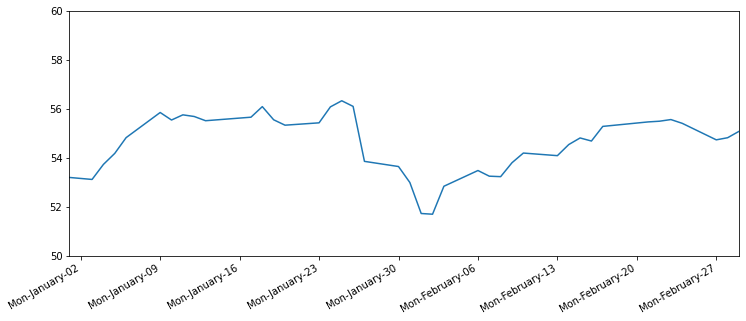

In [39]:
ax = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[50, 60], figsize=(12, 5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

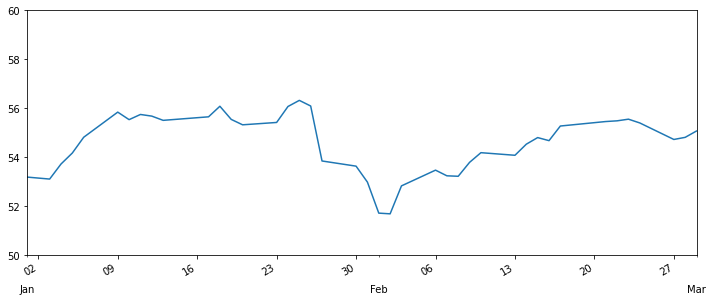

In [41]:
ax = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[50, 60], figsize=(12, 5))
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

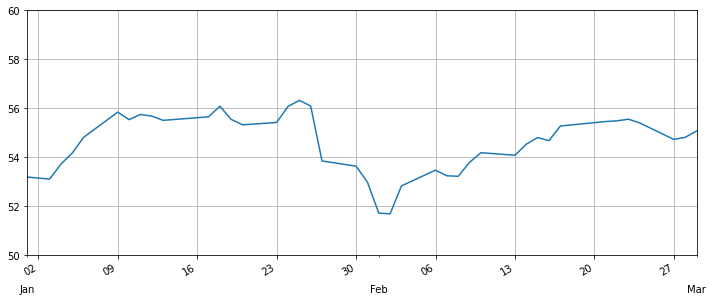

In [42]:
ax = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[50, 60], figsize=(12, 5))
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.xaxis.grid(True)
ax.yaxis.grid(True)